Softmax Classifier using Tensorflow

In [1]:
#They make your code deterministic — meaning the same random numbers (like weights, shuffling, dropout, etc.) will be generated every time you run your script.

#So your model:

#Starts with the same weights

#Sees data in the same order

#Learns in the same way

#Produces the same loss and accuracy results each time

#import tensorflow as tf
#import numpy as np

#tf.random.set_seed(42)
#np.random.seed(42)


In [2]:
import tensorflow as tf

# Load MNIST dataset from Keras datasets module
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000, 10)


In [3]:
print("Training data points:", x_train.shape[0])
print("Testing data points:", x_test.shape[0])


Training data points: 60000
Testing data points: 10000


In [4]:
from tensorflow.python.client import device_lib

# List all available devices
devices = device_lib.list_local_devices()

for device in devices:
    print(f"Name: {device.name}, Type: {device.device_type}")


Name: /device:CPU:0, Type: CPU


In [5]:
x_train = x_train.reshape(-1, 784).astype("float32")
x_test = x_test.reshape(-1, 784).astype("float32")



In [6]:
# Pick a batch size
batch_size = 100

# Get a batch of training data
x_batch = x_train[:batch_size]
y_true = y_train[:batch_size]


In [7]:
W = tf.Variable(tf.random.normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))
logits = tf.matmul(x_batch, W) + b
y_pred = tf.nn.softmax(logits)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-7  # small value to avoid log(0)
    y_pred = tf.clip_by_value(y_pred, epsilon, 1.0)  # clip predictions
    loss_per_example = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1)
    return tf.reduce_mean(loss_per_example)


loss = cross_entropy_loss(y_true, y_pred)
print("Loss:", loss.numpy())


Loss: 2.31049


In [8]:
# Set learning rate
#learning_rate = 0.1

# One training step
#with tf.GradientTape() as tape:
  #  logits = tf.matmul(x_batch, W) + b
  #  y_pred = tf.nn.softmax(logits)
   # loss = cross_entropy_loss(y_true, y_pred)

# Compute gradients w.r.t. W and b
#grads = tape.gradient(loss, [W, b])

# Update weights and biases manually
#W.assign_sub(learning_rate * grads[0])
#b.assign_sub(learning_rate * grads[1])

#print("Loss:", loss.numpy())


These is using Gradient Descent

In [9]:
# Parameters
#epochs = 10
#batch_size = 100
#learning_rate = 0.1

# Loop over epochs
#for epoch in range(epochs):
    #total_loss = 0

    # Loop over batches
    #for i in range(0, x_train.shape[0], batch_size):
     #   x_batch = x_train[i:i+batch_size]
      #  y_batch = y_train[i:i+batch_size]

       # with tf.GradientTape() as tape:
        #    logits = tf.matmul(x_batch, W) + b
         #   y_pred = tf.nn.softmax(logits)
          #  loss = cross_entropy_loss(y_batch, y_pred)

        #grads = tape.gradient(loss, [W, b])
        #W.assign_sub(learning_rate * grads[0])
        #b.assign_sub(learning_rate * grads[1])

        #total_loss += loss.numpy()

    #avg_loss = total_loss / (x_train.shape[0] / batch_size)
    #print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


These is using Adam

Epoch 1, Train Loss: 0.5333, Test Loss: 0.3637
Epoch 2, Train Loss: 0.3592, Test Loss: 0.3251
Epoch 3, Train Loss: 0.3313, Test Loss: 0.3090
Epoch 4, Train Loss: 0.3167, Test Loss: 0.2999
Epoch 5, Train Loss: 0.3073, Test Loss: 0.2940
Epoch 6, Train Loss: 0.3005, Test Loss: 0.2898
Epoch 7, Train Loss: 0.2953, Test Loss: 0.2866
Epoch 8, Train Loss: 0.2911, Test Loss: 0.2842
Epoch 9, Train Loss: 0.2876, Test Loss: 0.2822
Epoch 10, Train Loss: 0.2847, Test Loss: 0.2806


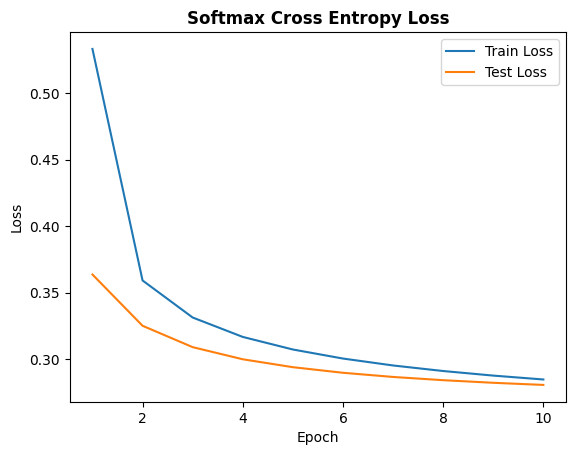

In [10]:
train_loss_history = []
test_loss_history = []
epochs = 10  # or any number of epochs you want
learning_rate = 0.1

for epoch in range(epochs):
    total_train_loss = 0
    num_batches = 0

    # Training loop
    for i in range(0, x_train.shape[0], batch_size):
        x_batch = x_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        with tf.GradientTape() as tape:
            logits = tf.matmul(x_batch, W) + b
            y_pred = tf.nn.softmax(logits)
            loss = cross_entropy_loss(y_batch, y_pred)

        grads = tape.gradient(loss, [W, b])
        W.assign_sub(learning_rate * grads[0])
        b.assign_sub(learning_rate * grads[1])

        total_train_loss += loss.numpy()
        num_batches += 1

    avg_train_loss = total_train_loss / num_batches
    train_loss_history.append(avg_train_loss)

    # Evaluate on test set
    logits_test = tf.matmul(x_test, W) + b
    y_pred_test = tf.nn.softmax(logits_test)
    test_loss = cross_entropy_loss(y_test, y_pred_test).numpy()
    test_loss_history.append(test_loss)

    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plotting
import matplotlib.pyplot as plt
plt.plot(range(1, epochs+1), train_loss_history, label='Train Loss')
plt.plot(range(1, epochs+1), test_loss_history, label='Test Loss')
# Bold title
plt.title('Softmax Cross Entropy Loss', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [11]:
# Step 1: Calculate logits and predictions for the test set
logits_test = tf.matmul(x_test, W) + b
y_pred_test = tf.nn.softmax(logits_test)

# Step 2: Get predicted class indices
predicted_classes = tf.argmax(y_pred_test, axis=1)

# Step 3: Get true class indices from one-hot labels
true_classes = tf.argmax(y_test, axis=1)

# Step 4: Compare predictions with true labels (element-wise equality)
correct_predictions = tf.equal(predicted_classes, true_classes)

# Step 5: Calculate accuracy as mean of correct predictions (cast bool to float)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

print("Test set accuracy:", accuracy.numpy())


Test set accuracy: 0.9202
